### Introduction

In today's digital world, electronic transactions have become an integral part of our lives. Credit card transactions, in particular, play a significant role in our daily financial activities. However, the rise of online transactions has also led to an increase in credit card fraud, where malicious actors attempt to make unauthorized transactions using stolen card information. To mitigate this risk and protect both consumers and financial institutions, the development of robust fraud detection systems is crucial.

The objective of this project is to design, implement, and evaluate a credit card fraud detection system using machine learning techniques. By analyzing historical credit card transaction data, we aim to develop a predictive model that can accurately distinguish between legitimate and fraudulent transactions. This model can then be integrated into real-time transaction processing systems to detect and prevent fraudulent activities in real time.
ndscape of electronic transactions.






#### Import relevant libraries

In [1]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
import re
import warnings
warnings.filterwarnings("ignore")

### Unzipping File

In [2]:
# Specify the path to the zip file and the destination directory for extraction
zip_file_path = 'Archive.zip'
extracted_folder_path = 'dataset'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print("Extraction complete!")

Extraction complete!


### Loading data

In [3]:
train_data= pd.read_csv('dataset/fraudTrain.csv')
test_data= pd.read_csv('dataset/fraudTest.csv')

In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Data cleaning and preprocessing

In [5]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
train_data.shape

(1296675, 23)

In [8]:
# Check for missing values in each column
missing_values = train_data.isnull().sum()

missing_values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

seems there are no missing values

In [9]:
# Check for duplicate rows
duplicates = train_data.duplicated()

# Print the duplicated rows
print(train_data[duplicates])

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


there are no dublicate rows

In [10]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


#### checking for outliers

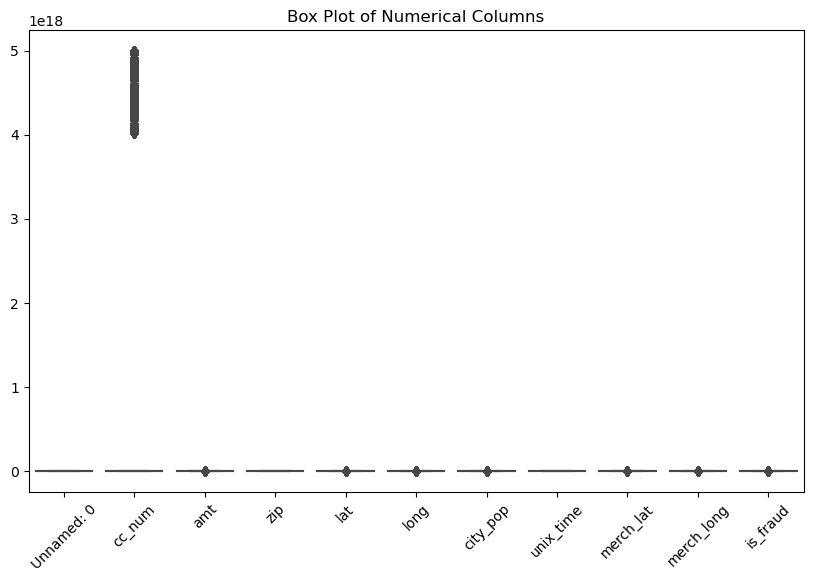

In [11]:


# Select numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64'])

# Create box plots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()


The outliers seems to be from the credit card number. This might not have impact on results 

### Check for class imbalance (fraudulent vs. legitimate transactions).

In [12]:
print(train_data['is_fraud'].value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


### Correlation Analysis 

In [13]:
correlation_matrix = train_data.corr()
fraud_corr = correlation_matrix['is_fraud'].sort_values(ascending=False)
print(fraud_corr)

is_fraud      1.000000
amt           0.219404
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num       -0.000981
zip          -0.002162
Unnamed: 0   -0.004767
unix_time    -0.005078
Name: is_fraud, dtype: float64


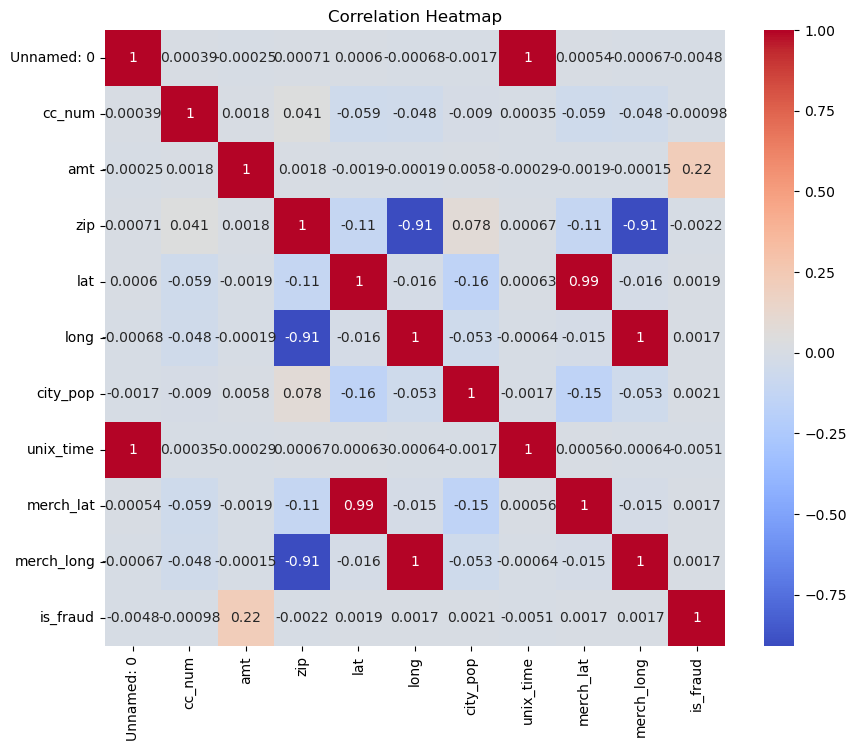

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Transaction Amount ('amt'): This feature has a positive correlation with 'is_fraud', which suggests that higher transaction amounts might be associated with fraudulent transactions. This is a common observation since fraudulent transactions might involve larger amounts.

City Population ('city_pop'): The positive correlation with 'is_fraud' is weak. It might suggest that transactions from areas with larger populations could be slightly more associated with fraud, but the impact seems minimal.

Location Coordinates ('lat', 'long', 'merch_lat', 'merch_long'): The low positive correlations imply that the geographical coordinates don't have strong predictive power by themselves. However, they could potentially contribute when combined with other features.

Credit Card Number ('cc_num'): The negative correlation suggests no direct relationship between the credit card number and fraud. This aligns with what was mentioned earlier – the credit card number is unlikely to directly influence fraud prediction.

Other Features (zip, Unnamed: 0, unix_time): The very low correlation values indicate that these features might not be strongly related to fraud.

### Brief EDA

#### Top 10 state with fraudulent transactions

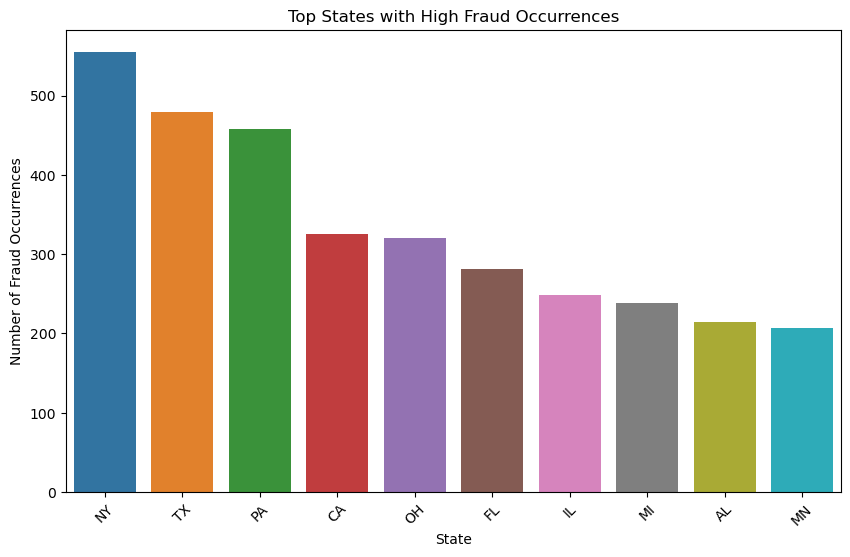

In [15]:
# Filter data for only fraudulent transactions
fraudulent_transactions = train_data[train_data['is_fraud'] == 1]

# Calculate the total number of fraudulent transactions for each state
fraud_by_state = fraudulent_transactions['state'].value_counts()

# Select the states with high fraud occurrences (e.g., top 10)
top_states = fraud_by_state.head(10)

# Create a bar plot for states with high fraud occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top States with High Fraud Occurrences')
plt.xlabel('State')
plt.ylabel('Number of Fraud Occurrences')
plt.xticks(rotation=45)
plt.show()

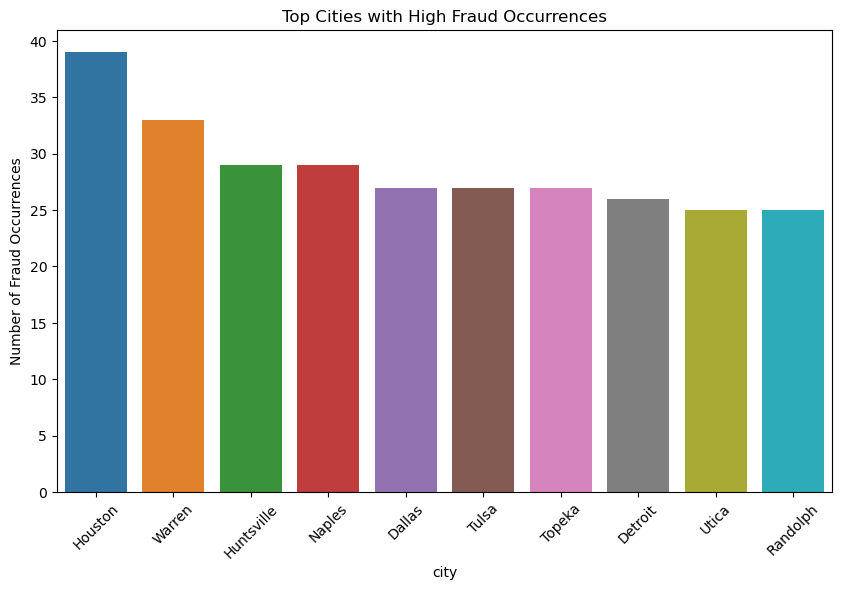

In [16]:
# Filter data for only fraudulent transactions
fraudulent_transactions = train_data[train_data['is_fraud'] == 1]

# Calculate the total number of fraudulent transactions for each state
fraud_by_city = fraudulent_transactions['city'].value_counts()

# Select the states with high fraud occurrences (e.g., top 10)
top_cities = fraud_by_city.head(10)

# Create a bar plot for states with high fraud occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top Cities with High Fraud Occurrences')
plt.xlabel('city')
plt.ylabel('Number of Fraud Occurrences')
plt.xticks(rotation=45)
plt.show()

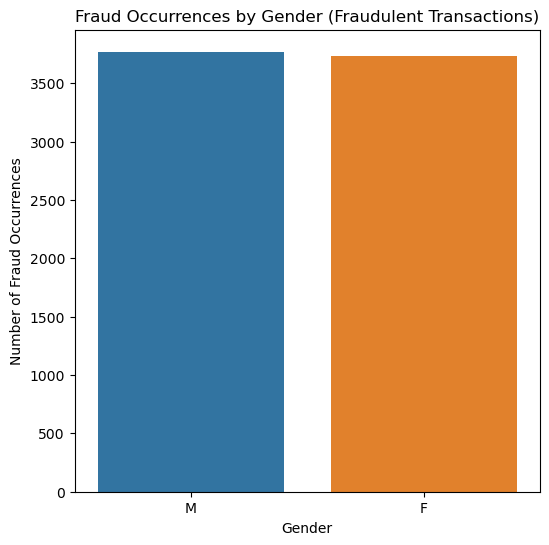

In [17]:
# Create a count plot of 'gender' for fraud occurrences
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=fraudulent_transactions)
plt.title('Fraud Occurrences by Gender (Fraudulent Transactions)')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Occurrences')
plt.show()

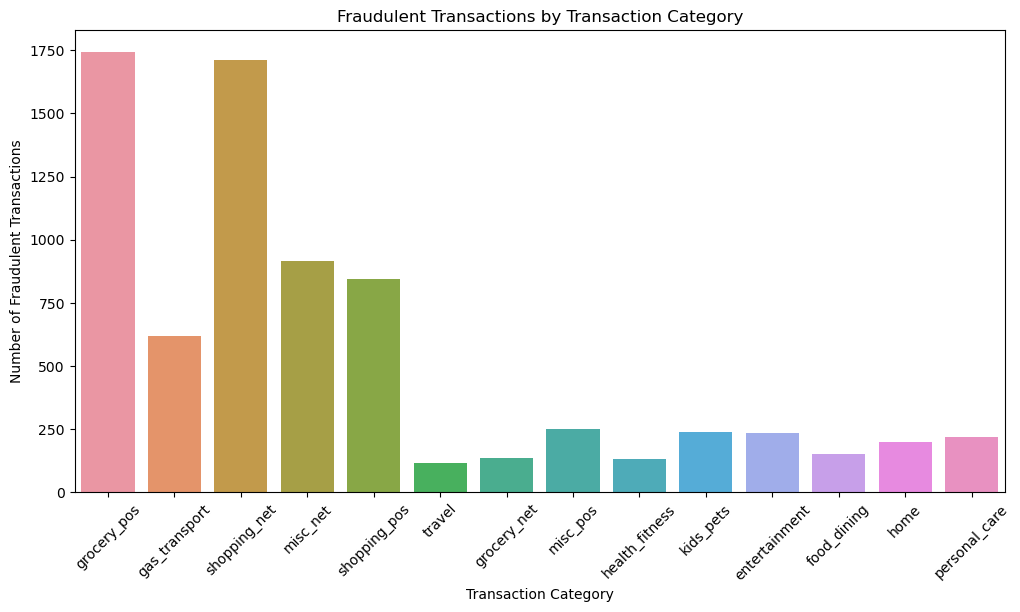

In [18]:
# Create a count plot of 'category' for fraudulent transactions
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=fraudulent_transactions)
plt.title('Fraudulent Transactions by Transaction Category')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

It appears groceries_pos and shopping_net recorded the highest number of fraudulent transaction

### Feature engineering

In [19]:

# Convert 'trans_date_trans_time' and 'dob' columns to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

# Check the updated data types
print(train_data.dtypes)


Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object


#### Creating some columns

Trans_date, age, trans_month, trans_year

In [20]:
train_data['trans_date']=train_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_data['trans_date']=pd.to_datetime(train_data['trans_date'])
# Calculate age at the time of transaction (in years)
train_data['age'] = (train_data['trans_date'] - train_data['dob']).astype('timedelta64[Y]')

# Display the updated DataFrame
train_data['age']


0          30.0
1          40.0
2          56.0
3          51.0
4          32.0
           ... 
1296670    58.0
1296671    40.0
1296672    52.0
1296673    39.0
1296674    24.0
Name: age, Length: 1296675, dtype: float64

In [21]:
train_data['trans_month'] = pd.DatetimeIndex(train_data['trans_date']).month
train_data['trans_year'] = pd.DatetimeIndex(train_data['trans_date']).year

#### Distance between merchant and customer in degree latitude and longitude

In [22]:
train_data['latitudinal_distance'] = abs(round(train_data['merch_lat']-train_data['lat'],3))
train_data['longitudinal_distance'] = abs(round(train_data['merch_long']-train_data['long'],3))

#### drop columns that are not needed

In [23]:


columns_to_drop = ['Unnamed: 0','cc_num', 'merchant','first','last','street','zip','trans_num',
                   'unix_time','trans_date_trans_time','lat','state','city',
                   'long','job','dob','merch_lat','merch_long','trans_date']
train_data.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
train_data.head(5)

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,F,3495,0,30.0,1,2019,0.068,0.870
1,grocery_pos,107.23,F,149,0,40.0,1,2019,0.271,0.024
2,entertainment,220.11,M,4154,0,56.0,1,2019,0.970,0.108
3,gas_transport,45.00,M,1939,0,51.0,1,2019,0.804,0.447
4,misc_pos,41.96,M,99,0,32.0,1,2019,0.254,0.830


### One-hot encoding categorical variables

In [24]:
from sklearn.preprocessing import OneHotEncoder


# Select the categorical columns for one-hot encoding
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()


# Instantiate the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected columns
encoded_categorical = encoder.fit_transform(train_data[categorical_columns])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names(categorical_columns))

# Concatenate the encoded features with the original DataFrame
encoded_train_data = pd.concat([train_data, encoded_df], axis=1)

# Drop the original categorical columns
encoded_train_data.drop(columns=categorical_columns, inplace=True)

# Display the updated DataFrame
encoded_train_data.head()


,amt,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,4.97,3495,0,30.0,1,2019,0.068,0.870,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107.23,149,0,40.0,1,2019,0.271,0.024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,220.11,4154,0,56.0,1,2019,0.970,0.108,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45.00,1939,0,51.0,1,2019,0.804,0.447,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,41.96,99,0,32.0,1,2019,0.254,0.830,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Building model

lets first evaluate the data to know if its a balance data

In [25]:
df_majority = encoded_train_data[(encoded_train_data['is_fraud']==0)] 
df_minority = encoded_train_data[(encoded_train_data['is_fraud']==1)]

In [26]:
print(encoded_train_data['is_fraud'].value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [27]:
df_majority.shape, df_minority.shape

((1289169, 22), (7506, 22))

In [28]:
encoded_train_data.columns

Index(['amt', 'city_pop', 'is_fraud', 'age', 'trans_month', 'trans_year',
       'latitudinal_distance', 'longitudinal_distance', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

When dealing with severe class imbalance, such as having 1,289,169 instances in one class and only 7,506 instances in the other class, it's important to carefully consider your approach. While resampling can help address class imbalance, the extreme imbalance in your case requires a more thoughtful strategy.

Given the large difference in class sizes, simple under-sampling might result in significant loss of valuable information from the majority class. Instead, we might want to focus on oversampling the minority class, creating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

SMOTE generates synthetic samples in the feature space, creating new instances that are combinations of existing instances. This can help prevent overfitting and improve model performance, especially when the minority class has limited samples.

In [29]:
from imblearn.over_sampling import SMOTE


# Select the columns you want to use for modeling
feature_columns = ['amt', 'city_pop', 'age', 'trans_month', 'trans_year',
       'latitudinal_distance', 'longitudinal_distance', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M']
target_column = 'is_fraud'

# Separate features and target
X = encoded_train_data[feature_columns]
y = encoded_train_data[target_column]


# Instantiate the SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=feature_columns), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)

# Display the distribution of the target variable after SMOTE oversampling
print(resampled_data[target_column].value_counts())


0    1289169
1    1289169
Name: is_fraud, dtype: int64


In [30]:
resampled_data.columns

Index(['amt', 'city_pop', 'age', 'trans_month', 'trans_year',
       'latitudinal_distance', 'longitudinal_distance', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'is_fraud'],
      dtype='object')

In [31]:
X_resampled = resampled_data[feature_columns]
X_resampled.columns

Index(['amt', 'city_pop', 'age', 'trans_month', 'trans_year',
       'latitudinal_distance', 'longitudinal_distance', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

In [32]:
y_resampled= resampled_data[target_column]
y_resampled


0          0
1          0
2          0
3          0
4          0
          ..
2578333    1
2578334    1
2578335    1
2578336    1
2578337    1
Name: is_fraud, Length: 2578338, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Now you have X_train, X_test as the feature sets and y_train, y_test as the target sets


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize models
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
logreg_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions on test data
logreg_preds = logreg_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test, logreg_preds))

print("Decision Tree:")
print(classification_report(y_test, dt_preds))

print("Random Forest:")
print(classification_report(y_test, rf_preds))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84    257186
           1       0.88      0.78      0.83    258482

    accuracy                           0.84    515668
   macro avg       0.84      0.84      0.83    515668
weighted avg       0.84      0.84      0.83    515668

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257186
           1       1.00      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257186
           1       1.00      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00

### Cross validation

In [36]:
from sklearn.model_selection import cross_val_score

# Define your models
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Choose a scoring metric (e.g., 'accuracy', 'precision', 'recall', 'f1', etc.)
scoring_metric = 'accuracy'

# Perform cross-validation for each model
logreg_scores = cross_val_score(logreg_model, X_resampled, y_resampled, cv=5, scoring=scoring_metric)
dt_scores = cross_val_score(dt_model, X_resampled, y_resampled, cv=5, scoring=scoring_metric)
rf_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring=scoring_metric)

# Print the cross-validation scores
print("Logistic Regression CV Scores:", logreg_scores)
print("Decision Tree CV Scores:", dt_scores)
print("Random Forest CV Scores:", rf_scores)

# Calculate the average scores
print("Average Logistic Regression CV Score:", logreg_scores.mean())
print("Average Decision Tree CV Score:", dt_scores.mean())
print("Average Random Forest CV Score:", rf_scores.mean())


Logistic Regression CV Scores: [0.85658602 0.85673922 0.85627186 0.85619208 0.85703952]
Decision Tree CV Scores: [0.9856458  0.99729089 0.99478347 0.80926451 0.99478539]
Random Forest CV Scores: [0.53861593 0.9971823  0.9955165  0.81136664 0.99624176]
Average Logistic Regression CV Score: 0.8565657412255951
Average Decision Tree CV Score: 0.9563540122908151
Average Random Forest CV Score: 0.8677846240636994


### Feature importance

In [39]:
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
decision_tree_feature_importance = dt_model.feature_importances_
random_forest_feature_importance = rf_model.feature_importances_


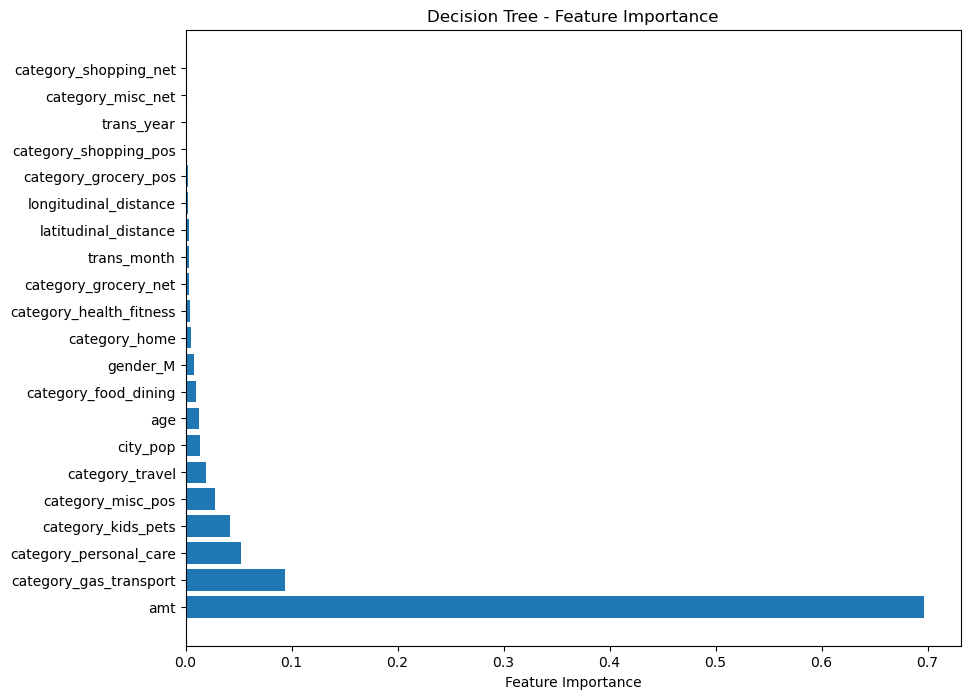

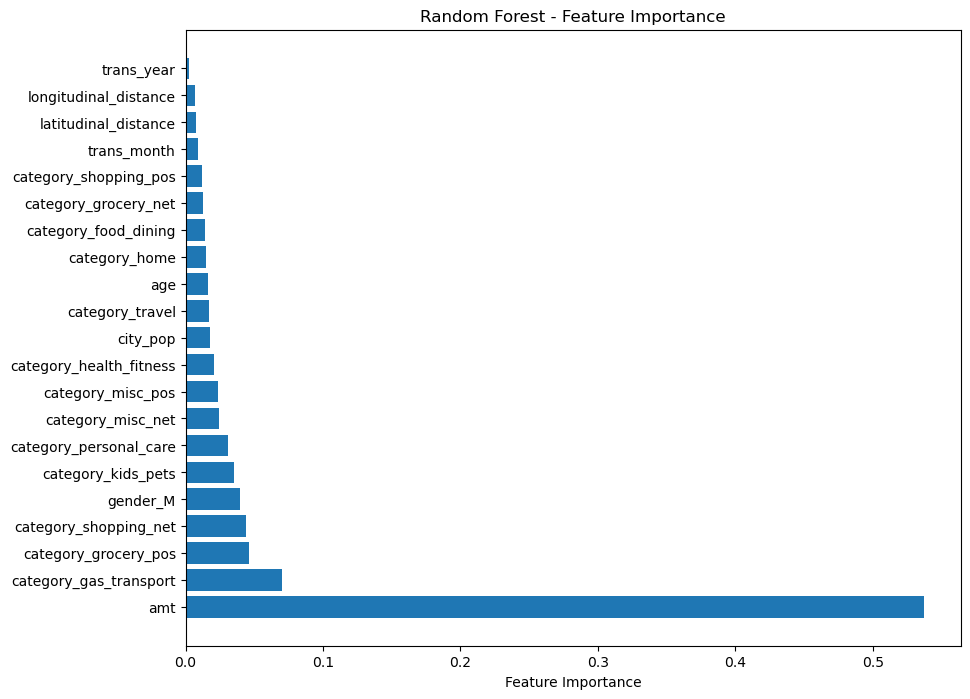

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    plt.barh(fi_df['feature_names'], fi_df['feature_importance'])
    plt.xlabel('Feature Importance')
    plt.title(f'{model_type} - Feature Importance')
    plt.show()

plot_feature_importance(decision_tree_feature_importance, X_resampled.columns, 'Decision Tree')
plot_feature_importance(random_forest_feature_importance, X_resampled.columns, 'Random Forest')


 #### Insight:
 
 
 The importance of the "amt" feature aligns with the intuition that fraudulent transactions might exhibit unusual or anomalous transaction amounts compared to legitimate transactions. This could be because fraudsters might try to keep transaction amounts small to avoid suspicion or might attempt large transactions to maximize gains before detection.